<a href="https://colab.research.google.com/github/sridhar-maddi/Sridhar_INFO5731_FALL2022/blob/main/INFO5731_Assignment_Four_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sridhar-maddi/Sridhar_INFO5731_FALL2022/main/review1')
df.head()

,document_id,Cleaned_text,sentiment
0,0,person saw hype claims masterpiece overreactin...,positive
1,1,every movie comes truly makes impact joaquins ...,positive
2,2,movie felt alone isolated truly relate underst...,positive
3,3,truly masterpiece best hollywood film one best...,positive
4,4,time movies anticipated like end falling short...,positive


In [ ]:
data = df.iloc[:, 1]
data.head()


0    person saw hype claims masterpiece overreactin...
1    every movie comes truly makes impact joaquins ...
2    movie felt alone isolated truly relate underst...
3    truly masterpiece best hollywood film one best...
4    time movies anticipated like end falling short...
Name: Cleaned_text, dtype: object

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Converting sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['person', 'saw', 'hype', 'claims', 'masterpiece', 'overreacting', 'overblown', 'excitement', 'another', 'joker', 'based', 'film', 'thought', 'looked', 'solid', 'best', 'even', 'bit', 'pretentious', 'trailer', 'say', 'incredibly', 'wrong', 'massive', 'achievement', 'cinema', 'thats', 'extremely', 'rare', 'day', 'age', 'cgi', 'nonsense', 'reboots', 'somewhat', 'reboot', 'sorts', 'standalone', 'origin', 'tale', 'impeccable', 'start', 'finish', 'echoes', 'resemblance', 'best', 'joker', 'origin', 'comics', 'past', 'joaquin', 'bleeds', 'sweats', 'cries', 'every', 'drop', 'magnificently', 'dedicated', 'performance', 'heath_ledger', 'would', 'proud', 'undoubtedly', 'greatest', 'acting', 'performance', 'since', 'heaths', 'joker', 'directing', 'writing', 'slickly', 'brilliant', 'bleak', 'settings', 'tones', 'palpable', 'throughout', 'film', 'place', 'blown', 'away', 'every', 'audience', 'member', 'awestruck', 'witnessed', 'film', 'could', 'still', 'transport', 'characters', 'world', 'existence'

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['person', 'see', 'hype', 'claim', 'masterpiece', 'overreact', 'overblown', 'excitement', 'joker', 'base', 'film', 'think', 'look', 'solid', 'well', 'even', 'bit', 'pretentious', 'trailer', 'say', 'incredibly', 'wrong', 'massive', 'achievement', 'cinema', 's', 'extremely', 'rare', 'day', 'age', 'nonsense', 'reboot', 'somewhat', 'reboot', 'sort', 'standalone', 'origin', 'impeccable', 'start', 'finish', 'echo', 'resemblance', 'good', 'joker', 'origin', 'comic_strip', 'bleed', 'sweat', 'cry', 'drop', 'magnificently', 'dedicate', 'performance', 'heath_ledger', 'proud', 'undoubtedly', 'great', 'acting', 'performance', 'heath', 'direct', 'write', 'slickly', 'brilliant', 'bleak', 'setting', 'tone', 'palpable', 'film', 'place', 'blow', 'audience', 'member', 'witness', 'film', 'still', 'transport', 'character', 'world', 'existence', 'believe', 'hype', 'go', 'revere', 'transcending', 'cinema']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]]


In [ ]:
# Or, you can see a human-readable form of the corpus itself.
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('achievement', 1),
  ('acting', 1),
  ('age', 1),
  ('audience', 1),
  ('base', 1),
  ('believe', 1),
  ('bit', 1),
  ('bleak', 1),
  ('bleed', 1),
  ('blow', 1),
  ('brilliant', 1),
  ('character', 1),
  ('cinema', 2),
  ('claim', 1),
  ('comic_strip', 1),
  ('cry', 1),
  ('day', 1),
  ('dedicate', 1),
  ('direct', 1),
  ('drop', 1),
  ('echo', 1),
  ('even', 1),
  ('excitement', 1),
  ('existence', 1),
  ('extremely', 1),
  ('film', 3),
  ('finish', 1),
  ('go', 1),
  ('good', 1),
  ('great', 1),
  ('heath', 1),
  ('heath_ledger', 1),
  ('hype', 2),
  ('impeccable', 1),
  ('incredibly', 1),
  ('joker', 2),
  ('look', 1),
  ('magnificently', 1),
  ('massive', 1),
  ('masterpiece', 1),
  ('member', 1),
  ('nonsense', 1),
  ('origin', 2),
  ('overblown', 1),
  ('overreact', 1),
  ('palpable', 1),
  ('performance', 2),
  ('person', 1),
  ('place', 1),
  ('pretentious', 1),
  ('proud', 1),
  ('rare', 1),
  ('reboot', 2),
  ('resemblance', 1),
  ('revere', 1),
  ('s', 1),
  ('say', 1),


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"movie" + 0.012*"good" + 0.012*"go" + 0.009*"make" + 0.009*"story" + '
  '0.009*"bad" + 0.009*"take" + 0.006*"think" + 0.006*"give" + 0.006*"ever"'),
 (1,
  '0.039*"film" + 0.011*"s" + 0.010*"good" + 0.010*"think" + 0.010*"review" + '
  '0.010*"joker" + 0.010*"people" + 0.009*"much" + 0.009*"go" + 0.007*"make"'),
 (2,
  '0.038*"movie" + 0.013*"great" + 0.013*"feel" + 0.010*"ve" + 0.009*"film" + '
  '0.008*"see" + 0.008*"make" + 0.008*"clown" + 0.008*"lot" + 0.007*"get"'),
 (3,
  '0.056*"movie" + 0.015*"see" + 0.011*"good" + 0.009*"character" + '
  '0.008*"make" + 0.008*"way" + 0.008*"time" + 0.007*"even" + 0.007*"go" + '
  '0.007*"joker"'),
 (4,
  '0.032*"movie" + 0.013*"feel" + 0.012*"good" + 0.012*"time" + 0.011*"joker" '
  '+ 0.010*"film" + 0.009*"oscar" + 0.009*"s" + 0.009*"character" + '
  '0.008*"say"'),
 (5,
  '0.038*"spoiler_content" + 0.018*"film" + 0.015*"movie" + 0.012*"get" + '
  '0.012*"story" + 0.012*"well" + 0.009*"character" + 0.009*"performance" + '
  '0.

In [ ]:
#3
Topic -1 discuss about, How good joker movie is.
Topic -2 Is about comic book
Topic -3 Is about mental illness
TOpic -4 Is about Cinematic Feel of movie joker.
Topic -5 Is about Joker movie Hype
Topic -6 Is about joker character in the movie.
Topic -7 Is about joaquin acting in the movie joker.
Topic -8 Is about Joker movie comparison with someother.
Topic -9 Is about joker Movie story.
Topic -10 Joker movie Cinematography

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here





In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sridhar-maddi/Sridhar_INFO5731_FALL2022/main/review1',header=0, sep=r'\s*,\s*')
df.head()

,document_id,Cleaned_text,sentiment
0,0,person saw hype claims masterpiece overreactin...,positive
1,1,every movie comes truly makes impact joaquins ...,positive
2,2,movie felt alone isolated truly relate underst...,positive
3,3,truly masterpiece best hollywood film one best...,positive
4,4,time movies anticipated like end falling short...,positive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])

df.head()

,document_id,Cleaned_text,sentiment
0,0,person saw hype claims masterpiece overreactin...,2
1,1,every movie comes truly makes impact joaquins ...,2
2,2,movie felt alone isolated truly relate underst...,2
3,3,truly masterpiece best hollywood film one best...,2
4,4,time movies anticipated like end falling short...,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(df['Cleaned_text'].apply(lambda x: np.str_(x)))
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 202)

print ("x_train", x_train.shape)
print ("x_test", x_test.shape)
print ("y_train", y_train.shape)
print ("y_test", y_test.shape)


x_train (80, 2162)
x_test (20, 2162)
y_train (80,)
y_test (20,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)
predictions_nb = nb.predict(x_test)
predictions_nb

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import classification_report

cr_naive = classification_report(y_test, predictions_nb)
print("Classification Report: ", "\n", "\n",cr_naive)


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.67      0.80         6
           2       0.50      1.00      0.67         8

    accuracy                           0.60        20
   macro avg       0.50      0.56      0.49        20
weighted avg       0.50      0.60      0.51        20



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = 10)

print(f"Accuracy of the Naive Bayes Model is :  {round(accuracies_nb.mean()*100)}%")



Accuracy of the Naive Bayes Model is :  62%


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predictions_svm = clf.predict(x_test)
predictions_svm


array([2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2])

In [ ]:
cr_svm = classification_report(y_test, predictions_svm)
print("Classification Report: ", "\n", "\n",cr_svm)


Classification Report:  
 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.67      0.80         6
           2       0.62      1.00      0.76         8

    accuracy                           0.75        20
   macro avg       0.87      0.72      0.74        20
weighted avg       0.85      0.75      0.74        20



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_svm = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)

print(f"Accuracy of the SVM Model is :  {round(accuracies_svm.mean()*100)}%")



Accuracy of the SVM Model is :  72%


In [ ]:
#Conclusion
The accuracy of the SVM model after 10-fold cross validation is 72 percent, whereas the accuracy of the Naive Bayes model is 62 percent.
 This means that the SVM model outperforms the naïve bayes model when it comes to categorizing tweets into distinct categories.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1 = pd.read_csv('test.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df.shape

(1459, 80)

In [ ]:
df1.shape

(1459, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
train_categorical_data = [var for var in df.columns if df[var].dtype=='O']
train_numerical_data = [var for var in df.columns if df[var].dtype=='float']


In [ ]:
for i in train_numerical_data:
    df[i].fillna(value = df[i].mean(),inplace = True)


In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
#test
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
test_categorical_data = [var for var in df1.columns if df1[var].dtype=='O']
test_numerical_data = [var for var in df1.columns if df1[var].dtype=='float']


In [ ]:
for i in test_numerical_data:
    df1[i].fillna(value = df1[i].mean(),inplace = True)

In [ ]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
df.shape

(1459, 77)

In [ ]:
df1.shape

(1459, 77)

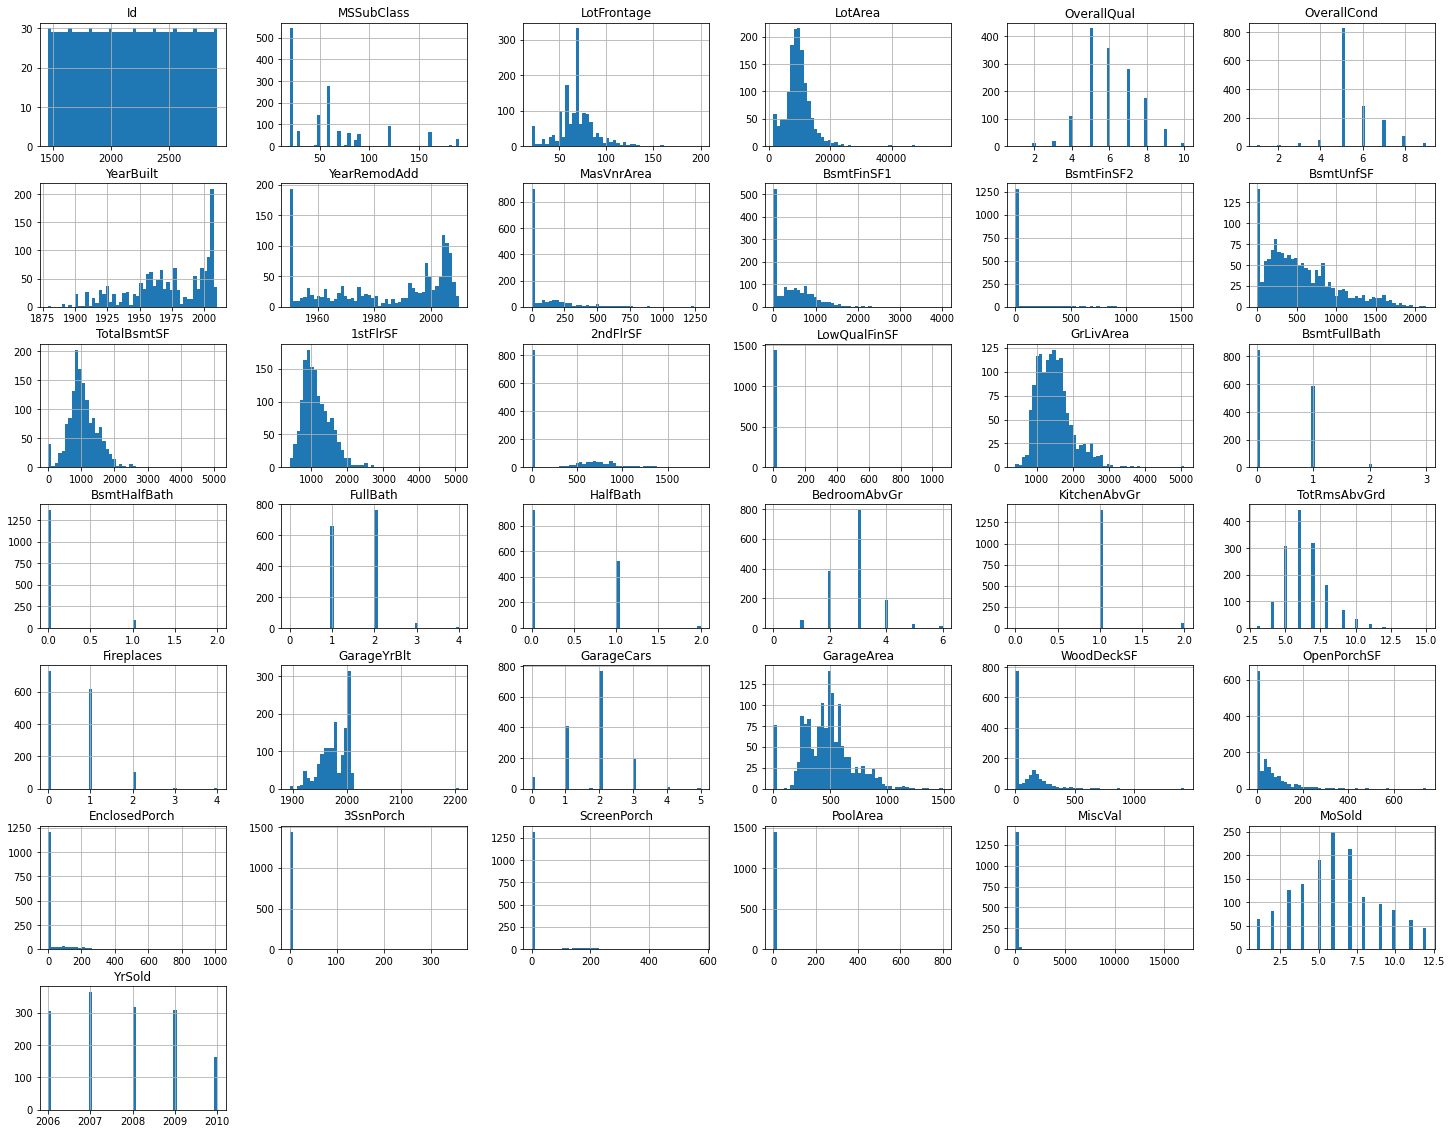

In [ ]:
#EDA
df.hist(bins=50, figsize=(25,20))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009badba30>,
      dtype=object)

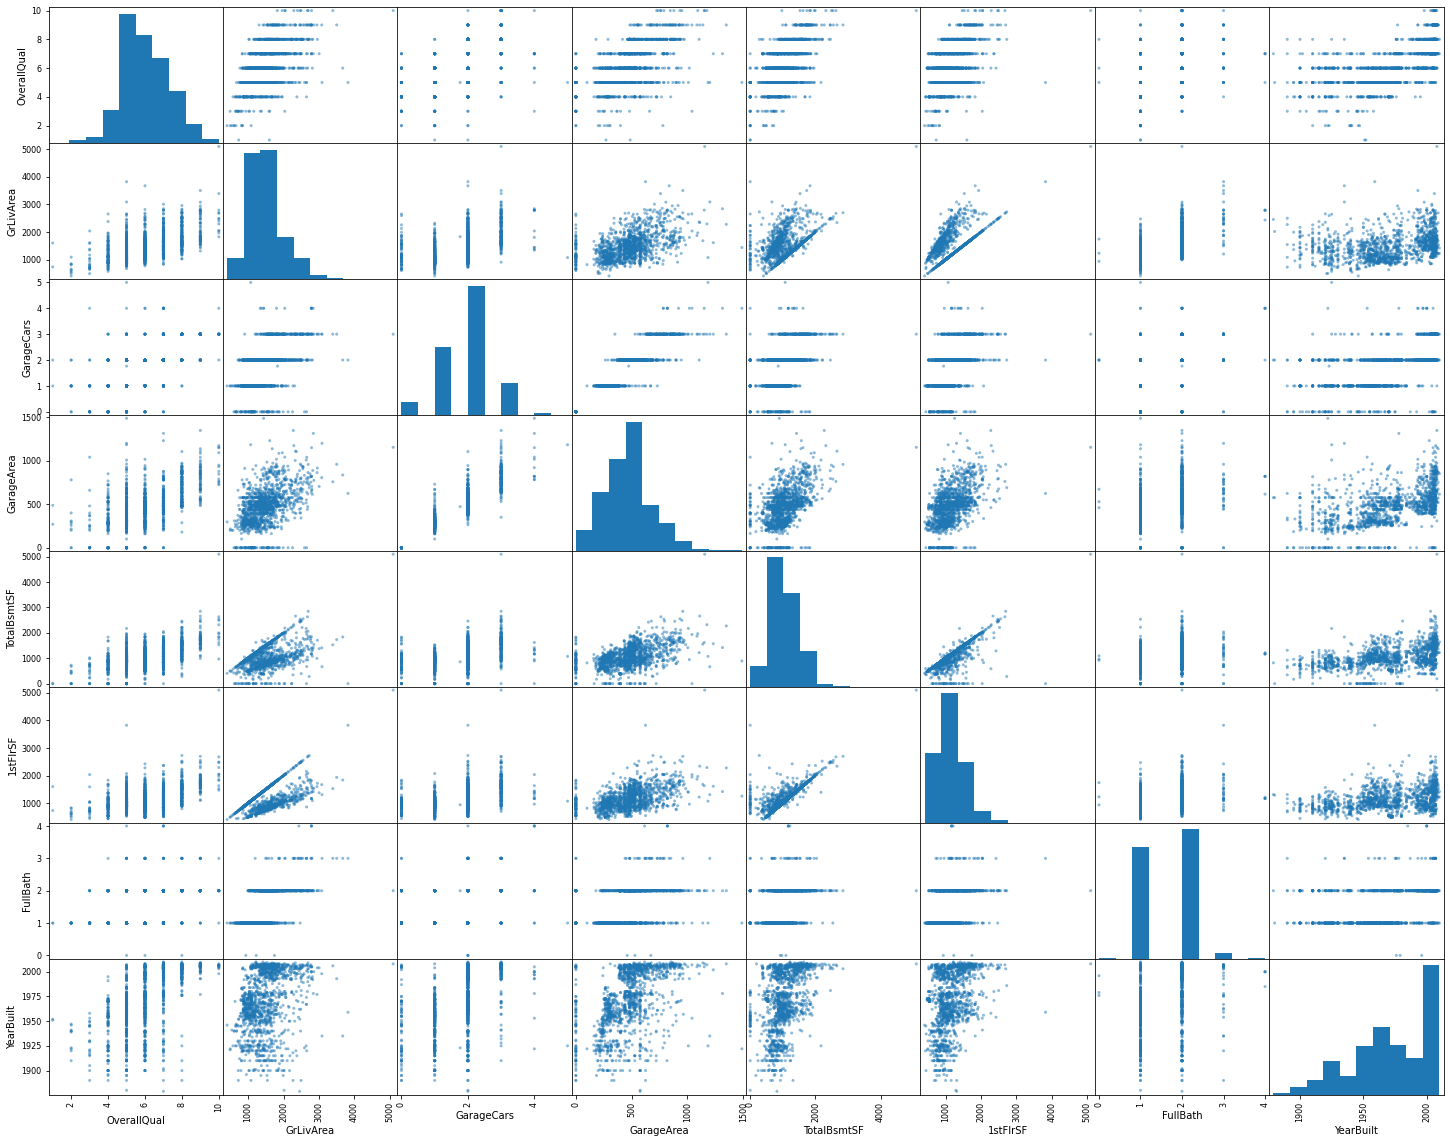

In [ ]:
from pandas.plotting import scatter_matrix
attributes = [ "OverallQual", "GrLivArea", "GarageCars", "GarageArea","TotalBsmtSF","1stFlrSF", "FullBath","YearBuilt" ]
scatter_matrix(df[attributes], figsize=(25, 20))




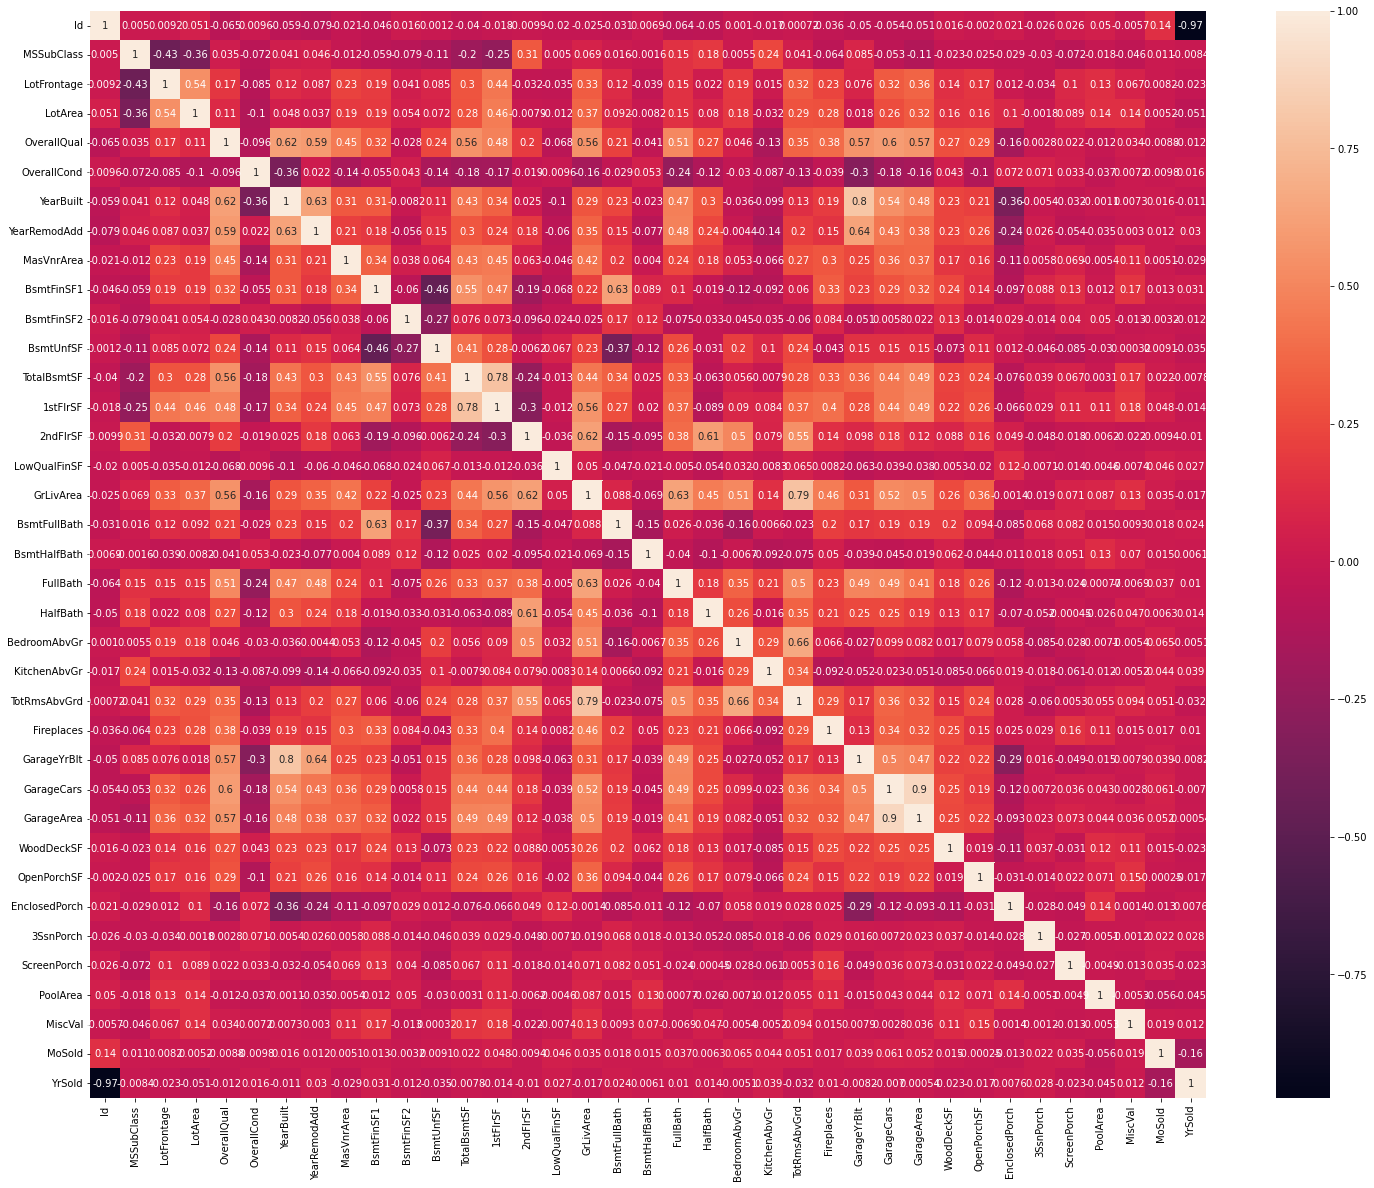

In [ ]:
#Correlation analysis
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True)


In [ ]:
# There are a lot of correlated attributes and manually removing every hihgly correlated attributes takes time.
# Therefore, writing a code to remove the correlated attributes based on the given threshold.
# I have considered the minimum threshold to be 0.8.
# I.e., if any two attributes are correlated by more than 80%, a single attribute out of those two will be dropped.

cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print("The attributes that needs to be dropped are:\n ",to_drop)


The attributes that needs to be dropped are:
  ['GarageArea', 'YrSold']


<ipython-input-33-85f023e492a4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [ ]:
#Dropping the ID and the correlated attributes from the training and test set
df.drop(columns = to_drop, axis = 1, inplace = True)
df1.drop(columns = to_drop, axis = 1, inplace = True)
# dropping id attributes
df.drop(labels = ['Id'], axis = 1, inplace = True)
df1.drop(labels = ['Id'], axis = 1, inplace = True)


In [ ]:
#Label encoding the data in both training and testing sets
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    encoder = LabelEncoder()
    encoder.fit(list(df[column].values))
    df[column] = encoder.transform(list(df[column].values))


In [ ]:
for column in df1.columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(df1[column].values))
    df1[column] = encoder_test.transform(list(df1[column].values))



In [ ]:
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]
x_test = df1.iloc[:,:-1]


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)


In [ ]:
print("R-Square Value: ", lr.score(x_train,y_train))


R-Square Value:  0.18689296746689366


In [ ]:
pd.DataFrame({' House Price Values Prediction': predictions_lr})

,House Price Values Prediction
0,3.737174
1,3.554597
2,4.125504
3,4.329134
4,4.215198
...,...
1454,3.683671
1455,3.577044
1456,3.597081
1457,3.344483
